In [152]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.cluster.vq import kmeans
from scipy.spatial.distance import pdist
from sklearn.decomposition import PCA
from kmodes.kmodes import KModes
from sklearn.cluster import SpectralBiclustering
import matplotlib.pyplot as plt
import seaborn as sns


In [153]:
df = pd.read_csv('BasicData_clean.csv')
gene_antibiotic_df = pd.read_csv('Empty_Gene_Antibiotic.csv')

In [154]:
df

,#Organism group,Isolate,AMR genotypes,drug,resistance
0,Listeria monocytogenes,PDT000077416.3,"fosx, lin",chloramphenicol,0.0
1,Listeria monocytogenes,PDT000077416.3,"fosx, lin",clindamycin,1.0
2,Listeria monocytogenes,PDT000077416.3,"fosx, lin",erythromycin,0.0
3,Listeria monocytogenes,PDT000077416.3,"fosx, lin",gentamicin,0.0
4,Listeria monocytogenes,PDT000077416.3,"fosx, lin",levofloxacin,0.0
...,...,...,...,...,...
316066,Enterobacter roggenkampii,PDT000898827.2,"blamir, cata, fosa, mcr10.1, oqxa, oqxb",tetracycline,0.0
316067,Enterobacter roggenkampii,PDT000898827.2,"blamir, cata, fosa, mcr10.1, oqxa, oqxb",trimethoprim-sulfamethoxazole,0.0
316068,Enterobacter roggenkampii,PDT001161812.2,"blamir16, cata, fosa, oqxb",ertapenem,0.0
316069,Enterobacter roggenkampii,PDT001161812.2,"blamir16, cata, fosa, oqxb",imipenem,0.5


In [86]:
df['drug'].nunique()

114

In [155]:
def gene_per_drug_all(drug):
    drug_df = df[df['drug'] == drug]
    unique_genes = set()
    for genes in drug_df['AMR genotypes'].str.split(', '):
        unique_genes.update(genes)
    return drug_df, unique_genes

In [156]:
def create_gene_df_clustering(drug_df, unique_genes):
    gene_arrays = []

    for idx, row in drug_df.iterrows():
        gene_array = np.zeros(len(unique_genes), dtype=int)
        genes = row['AMR genotypes'].split(', ')
        for gene in genes:
            gene_index = list(unique_genes).index(gene)
            gene_array[gene_index] = 1
            
        gene_arrays.append(gene_array.tolist())


    gene_df = pd.DataFrame(gene_arrays, columns=list(unique_genes))
   
    return gene_df.sample(frac=1).reset_index(drop=True)

In [157]:
def create_gene_df(drug_df, unique_genes):
    gene_arrays = []
    labels = []
    organizms = []

    for idx, row in drug_df.iterrows():
        gene_array = np.zeros(len(unique_genes), dtype=int)
        genes = row['AMR genotypes'].split(', ')
        for gene in genes:
            gene_index = list(unique_genes).index(gene)
            gene_array[gene_index] = 1
            
        gene_arrays.append(gene_array.tolist())
        labels.append(row['resistance'])
        organizms.append(row['#Organism group'])

    gene_df = pd.DataFrame(gene_arrays, columns=list(unique_genes))
    gene_df['label'] = labels
    gene_df['#Organism group'] = organizms
  

    return gene_df.sample(frac=1).reset_index(drop=True)

In [158]:
def KModes_model(df):
    hamming_distances = pdist(df.values, metric='hamming')
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(df.values)
    k = 3  # Number of clusters
    km = KModes(n_clusters=k, init='Huang', n_init=5, verbose=1)
    clusters = km.fit_predict(drug_df_for_clustering.values)
    # Visualize the clusters (using the reduced_data and labels from the previous example)
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters)
    plt.title('K-Modes Clustering')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

In [159]:
drug = 'ciprofloxacin'
drug_df,drug_genes = gene_per_drug_all(drug)
drug_df

,#Organism group,Isolate,AMR genotypes,drug,resistance
20,Salmonella enterica,PDT000003687.3,"mdsa, mdsb",ciprofloxacin,0.0
35,Salmonella enterica,PDT000003688.4,"mdsa, mdsb",ciprofloxacin,0.0
50,Salmonella enterica,PDT000003689.4,"mdsa, mdsb",ciprofloxacin,0.0
65,Salmonella enterica,PDT000003690.3,"aph3ib, aph6id, mdsa, mdsb, teta",ciprofloxacin,0.0
80,Salmonella enterica,PDT000003691.3,"mdsa, mdsb, tetb",ciprofloxacin,0.0
...,...,...,...,...,...
315962,Enterobacter roggenkampii,PDT000898823.2,"aph3ib, aph6id, blamir12, cata, fosa, oqxb",ciprofloxacin,0.0
315986,Enterobacter roggenkampii,PDT000898824.2,"aph3ib, aph6id, blamir12, cata, fosa, oqxb",ciprofloxacin,0.0
316010,Enterobacter roggenkampii,PDT000898825.2,"blamir, cata, fosa, mcr10.1, oqxa, oqxb",ciprofloxacin,0.0
316034,Enterobacter roggenkampii,PDT000898826.2,"aph3ib, aph6id, blamir12, cata, fosa, oqxb",ciprofloxacin,0.0


In [160]:
drug = 'ciprofloxacin'
drug_df,drug_genes = gene_per_drug_all(drug)
drug_df = create_gene_df(drug_df, drug_genes)
# drug_df.to_csv("df_test.csv")
drug_df

,blaoxa61,fosa3,blaadc97,qnre,aadd1,ant2ia,blakpc82,tetk,tet59,blapdc,...,blaokpb6,blashv12,blaoxa819,blaokpb5,blaoxa631,blaoxa461,blaoxa78,blamir21,label,#Organism group
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1.0,Acinetobacter baumannii
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,Salmonella enterica
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,Salmonella enterica
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.0,E.coli and Shigella
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,Salmonella enterica
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,E.coli and Shigella
21279,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,Salmonella enterica
21280,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,E.coli and Shigella
21281,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.0,Salmonella enterica


In [161]:
drug_df.to_csv('ciprofloxacin_df.csv')

In [10]:
# KModes_model(drug_df_for_clustering)

In [76]:
hamming_distances = pdist(drug_df_for_clustering.values, metric='hamming')


In [79]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(drug_df_for_clustering.values)


In [80]:
k = 3  # Number of clusters
km = KModes(n_clusters=k, init='Huang', n_init=5, verbose=1)
clusters = km.fit_predict(drug_df_for_clustering.values)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3564, cost: 126375.0
Run 1, iteration: 2/100, moves: 986, cost: 126007.0
Run 1, iteration: 3/100, moves: 858, cost: 125367.0
Run 1, iteration: 4/100, moves: 83, cost: 125367.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 4877, cost: 119012.0
Run 2, iteration: 2/100, moves: 1077, cost: 119012.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 5392, cost: 118594.0
Run 3, iteration: 2/100, moves: 1039, cost: 118594.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1566, cost: 121710.0
Run 4, iteration: 2/100, moves: 814, cost: 121710.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 3637, cost: 112268.0
Run 5, iteration: 2/10

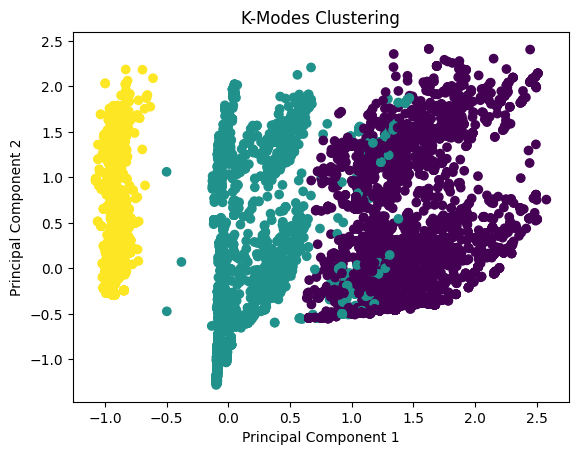

In [81]:
# Visualize the clusters (using the reduced_data and labels from the previous example)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters)
plt.title('K-Modes Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

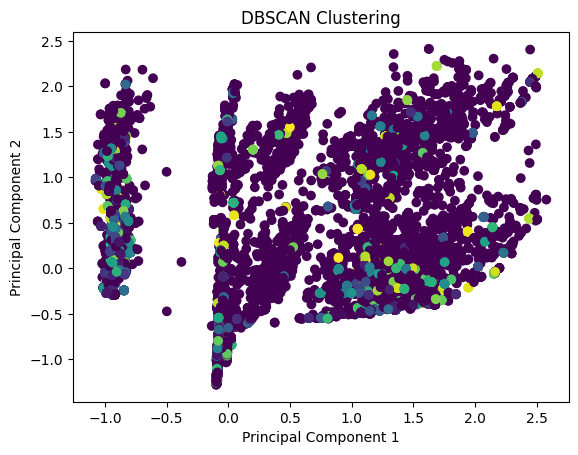

In [27]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming your binary data is stored in a DataFrame named binary_df
binary_data = drug_df_for_clustering.to_numpy()

# Dimensionality reduction
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(binary_data)

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(binary_data)

# Scatter plot
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters)
plt.title('DBSCAN Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [94]:
def plot_data(df, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(df, cmap='binary', cbar=False)
    plt.title(title)
    plt.xlabel('Gene')
    plt.ylabel('Bacteria')
    plt.show()
    

In [145]:
def Bicluster_model(df, n_clusters):
    data_matrix = df.to_numpy()
    # Perform biclustering
    bicluster = SpectralBiclustering(n_clusters=n_clusters, random_state=42)
    bicluster.fit(data_matrix)
    row_labels = bicluster.row_labels_
    # Create a DataFrame with the cluster labels
    cluster_df = pd.DataFrame(data_matrix, index=row_labels, columns=df.columns)
    cluster_df['Cluster'] = row_labels  # Add a column for the cluster labels

    # Sort the DataFrame based on the cluster labels
    cluster_df.sort_values('Cluster', inplace=True)

    # Drop the 'Cluster' column for visualization
    cluster_df.drop('Cluster', axis=1, inplace=True)
    return cluster_df

In [186]:
# def Bicluster_model_viz(df, n_clusters, title):
#     df.drop('label',axis=1, inplace=True)
#     data_matrix = df.to_numpy()
#     # Perform biclustering
#     bicluster = SpectralBiclustering(n_clusters=n_clusters, random_state=42)
#     bicluster.fit(data_matrix)
#     row_labels = bicluster.row_labels_
#     # Create a DataFrame with the cluster labels
#     cluster_df = pd.DataFrame(data_matrix, index=row_labels, columns=df.columns)
#     cluster_df['Cluster'] = row_labels  # Add a column for the cluster labels

#     # Sort the DataFrame based on the cluster labels
#     cluster_df.sort_values('Cluster', inplace=True)

#     # Drop the 'Cluster' column for visualization
#     cluster_df.drop('Cluster', axis=1, inplace=True)
#     plt.figure(figsize=(10, 8))
#     sns.heatmap(cluster_df, cmap='binary', cbar=False)
#     plt.title(title)
#     plt.xlabel('Gene')
#     plt.ylabel('Bacteria')
#     plt.show()

In [7]:
def Bicluster_model_viz(df, n_clusters, title):
    df_copy = df.copy()
    df_copy.drop('label', axis=1, inplace=True)
    df_copy.drop('#Organism group', axis=1, inplace=True)
    data_matrix = df_copy.to_numpy()
    
    # Perform biclustering
    bicluster = SpectralBiclustering(n_clusters=n_clusters, random_state=42)
    bicluster.fit(data_matrix)
    row_labels = bicluster.row_labels_
    
    # Create a DataFrame with the cluster labels
    cluster_df = pd.DataFrame(data_matrix, index=df.index, columns=df_copy.columns)
    cluster_df['Cluster'] = row_labels  # Add a column for the cluster labels
    cluster_df['label'] = df['label']  # Add a column for the original labels
    cluster_df['#Organism group'] = df['#Organism group']
    # Sort the DataFrame based on the row labels
    cluster_df.sort_values('Cluster', inplace=True)
    
    # Reindex the DataFrame with a combination of original index, label, and row labels
    cluster_df.set_index(['Cluster', 'label','#Organism group'], append=True, inplace=True)
    cluster_df.sort_index(level='Cluster', inplace=True)
    
    plt.figure(figsize=(10, 8))
    cmap = sns.color_palette('binary', as_cmap=True)
    sns.heatmap(cluster_df, cmap=cmap, cbar=False)
    plt.title(title)
    plt.xlabel('Gene')
    plt.ylabel('Bacteria')
    plt.show()
    return cluster_df

In [226]:
cluster_df.to_csv('cluster_df_ciprofloxacin.csv')

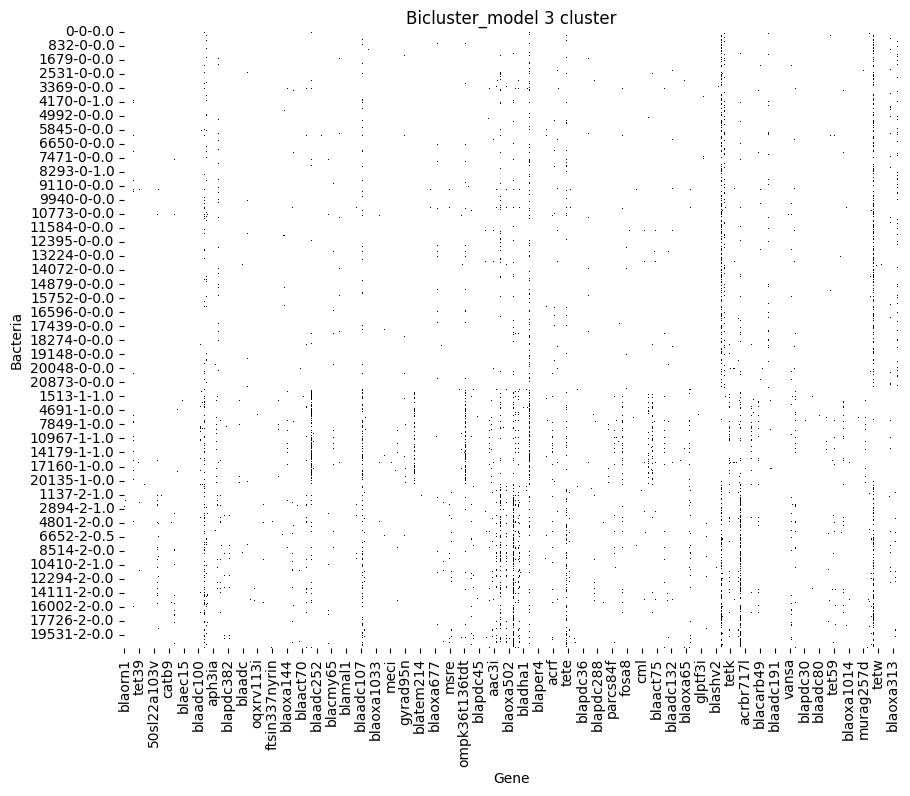

In [222]:
Bicluster_model_viz(drug_df, 3, 'Bicluster_model 3 cluster')

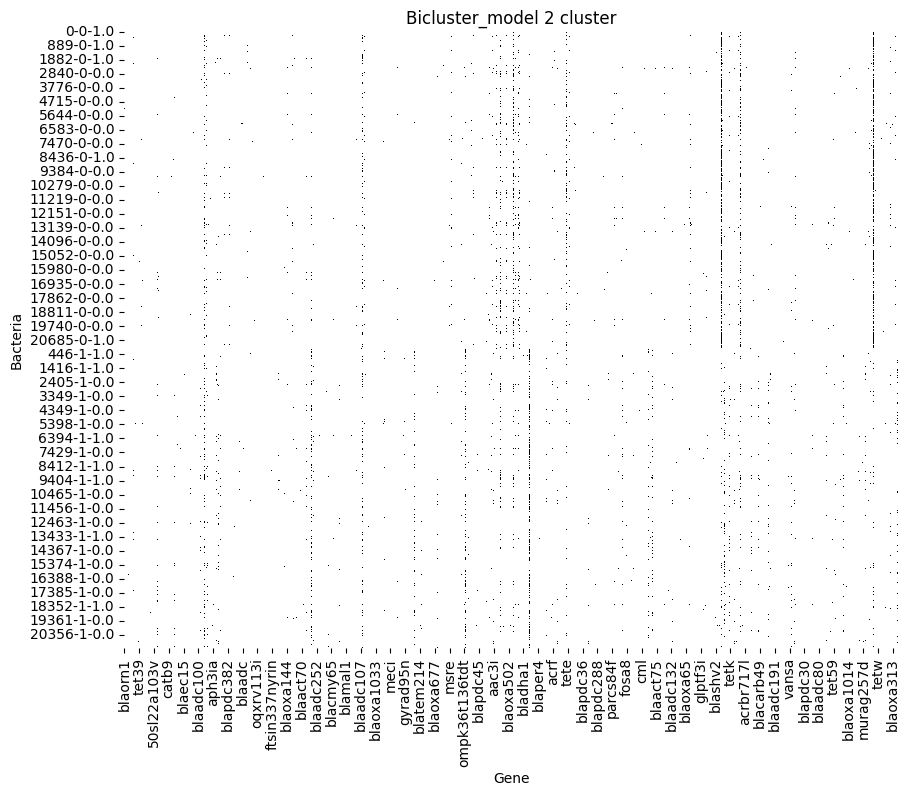

In [238]:
cluster_df_2_ciprofloxacin = Bicluster_model_viz(drug_df, 2, 'Bicluster_model 2 cluster')
cluster_df_2_ciprofloxacin.to_csv('cluster_df_2_ciprofloxacin.csv')

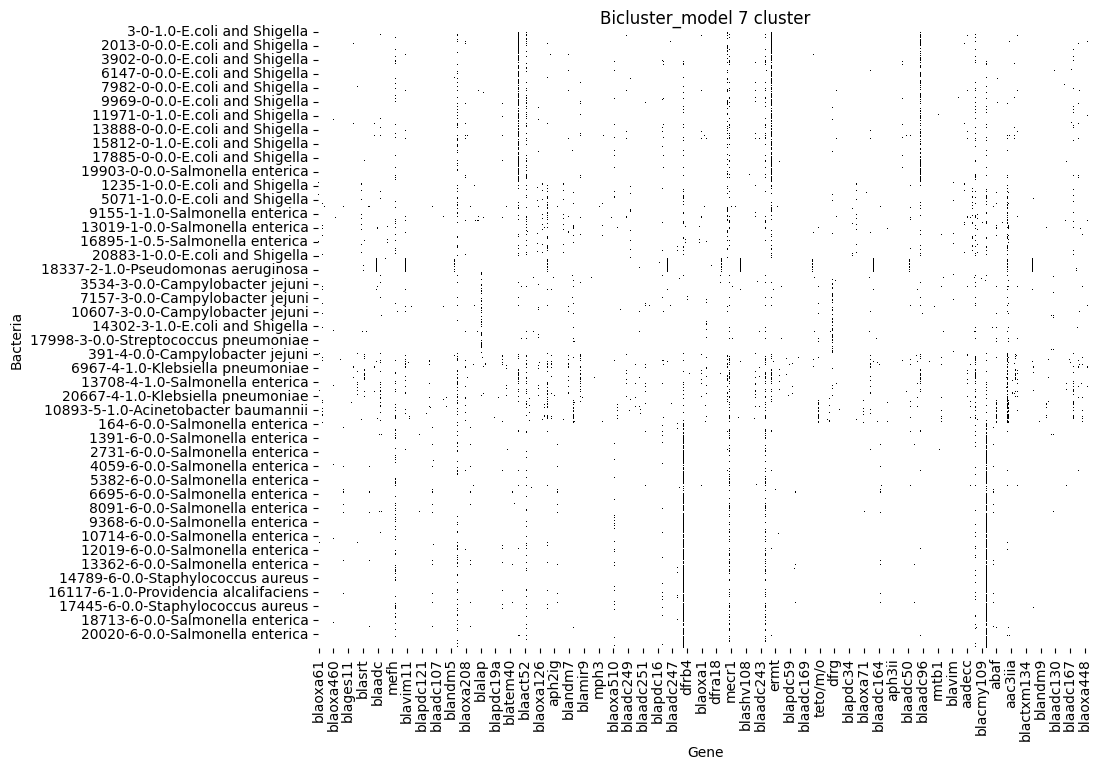

In [213]:
cluster_df_7_ciprofloxacin = Bicluster_model_viz(drug_df, 7, 'Bicluster_model 7 cluster')
cluster_df_7_ciprofloxacin.to_csv('cluster_df_7_ciprofloxacin.csv')

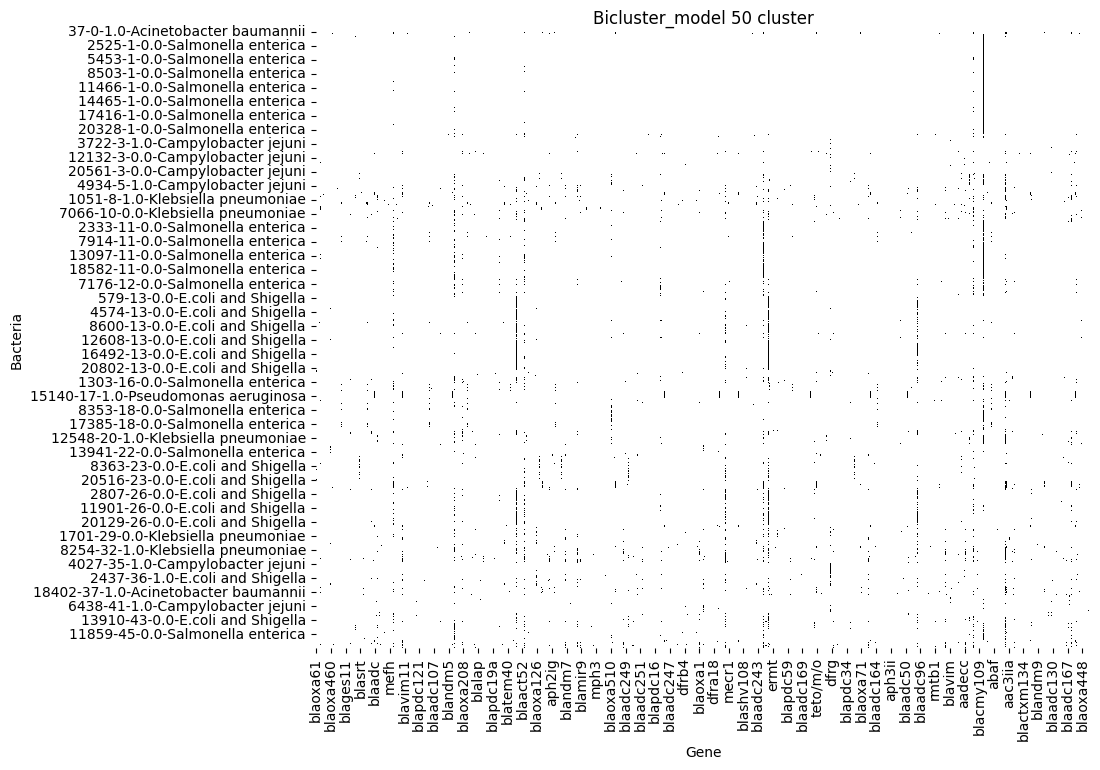

In [172]:
cluster_df_50_ciprofloxacin = Bicluster_model_viz(drug_df, 50, 'Bicluster_model 50 cluster')
cluster_df_50_ciprofloxacin.to_csv('cluster_df_50_ciprofloxacin.csv')

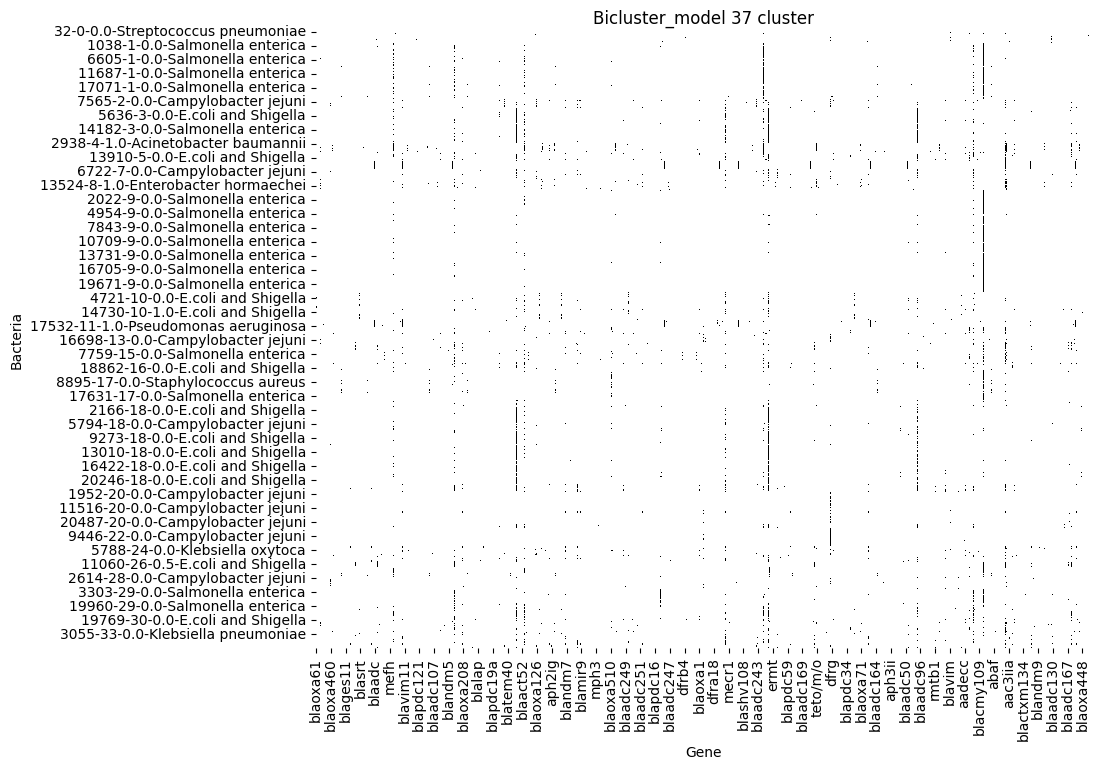

In [194]:
cluster_df_37_ciprofloxacin = Bicluster_model_viz(drug_df, 37, 'Bicluster_model 37 cluster')
cluster_df_37_ciprofloxacin.to_csv('cluster_df_37_ciprofloxacin.csv')

In [214]:
def Cluster_distribution(df):
    
    # cluster & #Organism group
    tab = df.groupby(["Cluster",  "#Organism group"]).size()/df.groupby(["Cluster"]).size()
    t= tab.unstack()
    max_organism_group = t.idxmax(axis=1)
    max_value = t.max(axis=1)
    cluster_organizm = pd.DataFrame({'#Organism group': max_organism_group, 'Max Value': max_value})
    
    # cluster & label
    tab1 = df.groupby(["Cluster", "label"]).size()/df.groupby(["Cluster"]).size()

    max_label = tab1.groupby('Cluster').idxmax()

    # Extract the second element from each tuple in 'max_label'
    max_label = max_label.apply(lambda x: x[1])

    # Use max() to get the maximum value for each 'Cluster'
    max_value1 = tab1.groupby('Cluster').max()

    # Combine the results into a new DataFrame
    cluster_label = pd.DataFrame({'label': max_label, 'Max Value': max_value1})
    merged_df = cluster_organizm.merge(cluster_label, on='Cluster')
    return merged_df.sort_values(by=['#Organism group', 'label'])


In [212]:
Cluster_distribution_37 = Cluster_distribution(cluster_df_37_ciprofloxacin)
Cluster_distribution_37

,#Organism group,Max Value_x,label,Max Value_y
Cluster,,,,
24,Acinetobacter baumannii,0.318996,0.0,0.491039
31,Acinetobacter baumannii,0.234694,0.0,0.627551
4,Acinetobacter baumannii,0.996753,1.0,0.944805
8,Acinetobacter baumannii,0.892388,1.0,0.850394
36,Acinetobacter baumannii,0.549020,1.0,0.627451
0,Campylobacter jejuni,0.378238,0.0,0.873057
7,Campylobacter jejuni,0.406417,0.0,0.588235
13,Campylobacter jejuni,0.548276,0.0,0.755172
20,Campylobacter jejuni,0.932482,0.0,0.800182


In [216]:
Cluster_distribution_50 = Cluster_distribution(cluster_df_50_ciprofloxacin)
Cluster_distribution_50

,#Organism group,Max Value_x,label,Max Value_y
Cluster,,,,
0,Acinetobacter baumannii,1.000000,1.0,0.911765
9,Acinetobacter baumannii,0.751174,1.0,0.624413
24,Acinetobacter baumannii,0.974790,1.0,0.941176
31,Acinetobacter baumannii,0.982759,1.0,0.741379
33,Acinetobacter baumannii,0.426901,1.0,0.678363
37,Acinetobacter baumannii,0.906103,1.0,0.929577
48,Acinetobacter baumannii,0.545455,1.0,0.636364
3,Campylobacter jejuni,0.884647,0.0,0.817427
14,Campylobacter jejuni,0.563981,0.0,0.796209


In [196]:
# tab = cluster_df_37_ciprofloxacin.groupby(["Cluster",  "#Organism group"]).size()/cluster_df_37_ciprofloxacin.groupby(["Cluster"]).size()
# t= tab.unstack()
# # Use idxmax() to get the #Organism group with the max value for each Cluster
# max_organism_group = t.idxmax(axis=1)

# # Use max() to get the maximum value for each Cluster
# max_value = t.max(axis=1)

# # Combine the results into a new DataFrame
# cluster_organizm = pd.DataFrame({'#Organism group': max_organism_group, 'Max Value': max_value})


In [197]:
# tab1 = cluster_df_37_ciprofloxacin.groupby(["Cluster", "label"]).size()/cluster_df_37_ciprofloxacin.groupby(["Cluster"]).size()

# max_label = tab1.groupby('Cluster').idxmax()

# # Extract the second element from each tuple in 'max_label'
# max_label = max_label.apply(lambda x: x[1])

# # Use max() to get the maximum value for each 'Cluster'
# max_value1 = tab1.groupby('Cluster').max()

# # Combine the results into a new DataFrame
# cluster_label = pd.DataFrame({'label': max_label, 'Max Value': max_value1})



In [198]:
# merged_df = cluster_organizm.merge(cluster_label, on='Cluster')

# merged_df.to_csv('clusters.csv')

In [202]:
# merged_df

,#Organism group,Max Value_x,label,Max Value_y
Cluster,,,,
0,Campylobacter jejuni,0.378238,0.0,0.873057
1,Salmonella enterica,0.953981,0.0,0.982420
2,E.coli and Shigella,0.426573,1.0,0.576923
3,E.coli and Shigella,0.880816,0.0,0.862041
4,Acinetobacter baumannii,0.996753,1.0,0.944805
5,E.coli and Shigella,0.601266,0.0,0.797468
6,Pseudomonas aeruginosa,0.996169,1.0,0.965517
7,Campylobacter jejuni,0.406417,0.0,0.588235
8,Acinetobacter baumannii,0.892388,1.0,0.850394


In [163]:
# df_salmonella = pd.read_csv(r'ciprofloxacin_df.csv')
# df_salmonella.drop('Unnamed: 0', inplace=True, axis=1)
# df_salmonella = df_salmonella[(df_salmonella['#Organism group'] == 'Salmonella enterica') & (df_salmonella['label'] != 0.5)].copy()
# df_salmonella.reset_index(inplace = True)
# df_salmonella.drop('index', axis=1, inplace=True)
# #df_salmonella.drop('level_0', axis=1, inplace=True)
# df_salmonella

In [164]:
# df = drug_df
# n_clusters=2
# title='Bicluster_model 2 cluster on salmonella'


# df_copy = df.copy()
# df_copy.drop('label', axis=1, inplace=True)
# df_copy.drop('#Organism group', axis=1, inplace=True)
# data_matrix = df_copy.to_numpy()
# data_matrix

In [165]:
# ciprofloxacin_df = pd.read_csv(r'ciprofloxacin_df.csv')
# ciprofloxacin_df.drop('Unnamed: 0', inplace=True, axis=1)
# ciprofloxacin_df.describe()

In [166]:
df_salmonella = pd.read_csv(r'ciprofloxacin_df.csv')
df_salmonella.drop('Unnamed: 0', inplace=True, axis=1)
df_salmonella = df_salmonella[(df_salmonella['#Organism group'] == 'Salmonella enterica') & (df_salmonella['label'] != 0.5)].copy()
df_salmonella.reset_index(inplace = True)
df_salmonella.drop('index', axis=1, inplace=True)
df_salmonella = df_salmonella.drop(df_salmonella.columns[(df_salmonella == 0).all()], axis=1)
df_salmonella


,fosa3,ant2ia,blashv2a,arma,cmla1,blactxm65,dfra17,dfra19,aada12,abcf,...,aph2ia,cata2,aac3iv,aph3ia,dfra12,msre,aph3iia,blashv12,label,#Organism group
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,Salmonella enterica
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,Salmonella enterica
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,Salmonella enterica
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,Salmonella enterica
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,Salmonella enterica
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,Salmonella enterica
8370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,Salmonella enterica
8371,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0.0,Salmonella enterica
8372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,Salmonella enterica


In [167]:
df_salmonella['label'].sum()/df_salmonella['label'].count()

0.052304752806305234

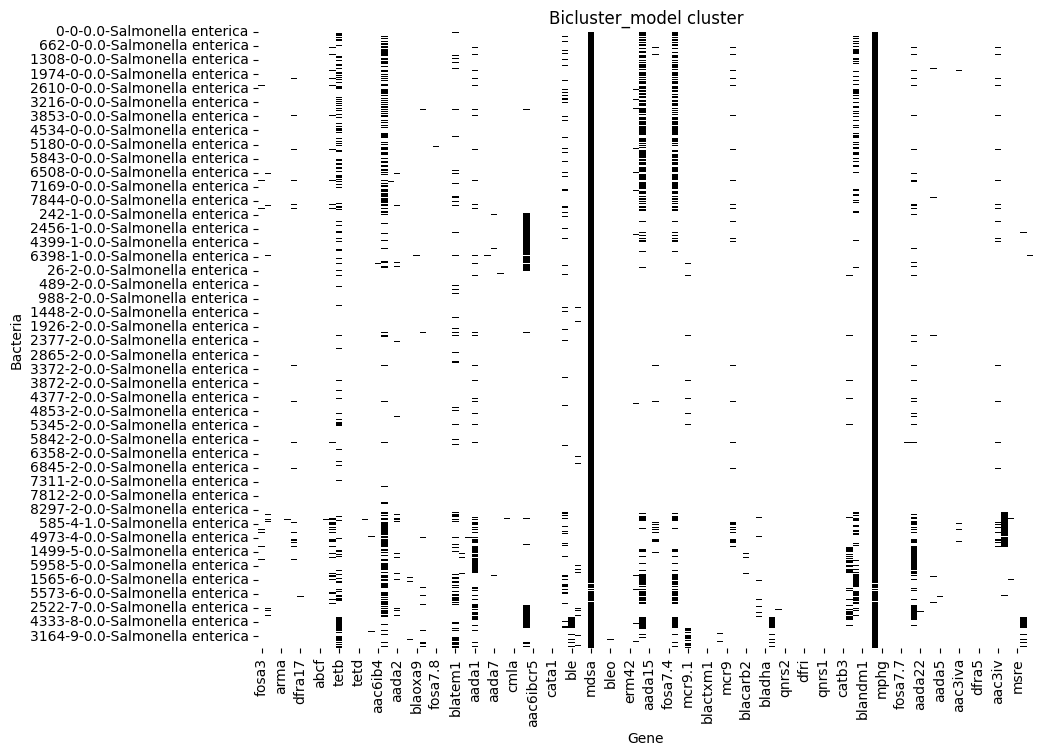

In [191]:
cluster_df_salmonella = Bicluster_model_viz(df_salmonella, 10, 'Bicluster_model cluster')


In [192]:
cluster_df_salmonella.to_csv("cluster_df_salmonella.csv")

In [193]:
tab1 = cluster_df_salmonella.groupby(["Cluster", "label"]).size()/cluster_df_salmonella.groupby(["Cluster"]).size()
tab1.unstack()


label,0.0,1.0
Cluster,,
0,0.964649,0.035351
1,0.998721,0.001279
2,0.974672,0.025328
3,0.985612,0.014388
4,0.542522,0.457478
5,0.780488,0.219512
6,0.969048,0.030952
7,0.993750,0.006250
8,1.000000,NaN


In [177]:
df_Acinetobacter_baumannii = pd.read_csv(r'ciprofloxacin_df.csv')
df_Acinetobacter_baumannii.drop('Unnamed: 0', inplace=True, axis=1)
df_Acinetobacter_baumannii = df_Acinetobacter_baumannii[(df_Acinetobacter_baumannii['#Organism group'] == 'Acinetobacter baumannii') & (df_Acinetobacter_baumannii['label'] != 0.5)].copy()
df_Acinetobacter_baumannii.reset_index(inplace = True)
df_Acinetobacter_baumannii.drop('index', axis=1, inplace=True)
df_Acinetobacter_baumannii = df_Acinetobacter_baumannii.drop(df_Acinetobacter_baumannii.columns[(df_Acinetobacter_baumannii == 0).all()], axis=1)
df_Acinetobacter_baumannii


,blaadc97,ant2ia,blaadc56,arma,arr3,blartg,blaz,blages11,blaoxa253,blaoxa164,...,blaadc167,aph3ia,blaoxa82,blaadc26,blaoxa317,msre,blaoxa819,blaoxa78,label,#Organism group
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.0,Acinetobacter baumannii
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1.0,Acinetobacter baumannii
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.0,Acinetobacter baumannii
3,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1.0,Acinetobacter baumannii
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.0,Acinetobacter baumannii
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.0,Acinetobacter baumannii
1069,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.0,Acinetobacter baumannii
1070,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1.0,Acinetobacter baumannii
1071,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.0,Acinetobacter baumannii


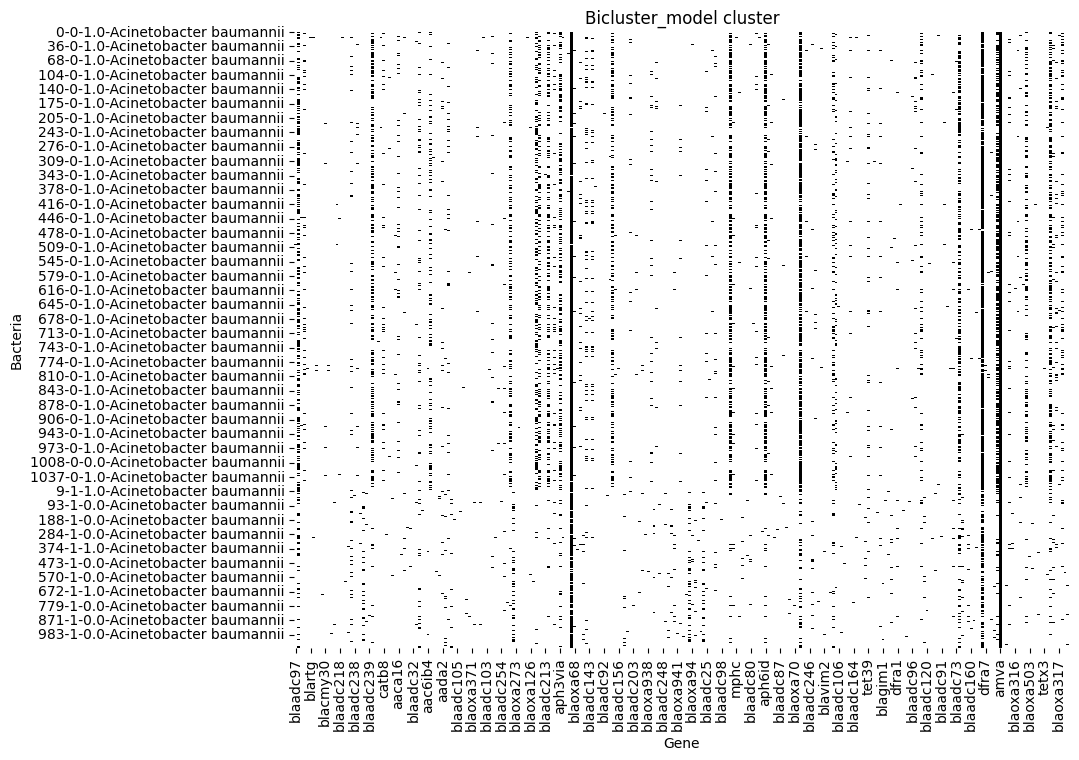

In [223]:
cluster_df_Acinetobacter_baumannii = Bicluster_model_viz(df_Acinetobacter_baumannii, 2, 'Bicluster_model cluster')

In [224]:
tab1 = cluster_df_Acinetobacter_baumannii.groupby(["Cluster", "label"]).size()/cluster_df_Acinetobacter_baumannii.groupby(["Cluster"]).size()
tab1.unstack()

label,0.0,1.0
Cluster,,
0,0.050063,0.949937
1,0.722628,0.277372


In [225]:
cluster_df_Acinetobacter_baumannii

,,,,blaadc97,ant2ia,blaadc56,arma,arr3,blartg,blaz,blages11,blaoxa253,blaoxa164,...,blaoxa387,tetx3,blaadc167,aph3ia,blaoxa82,blaadc26,blaoxa317,msre,blaoxa819,blaoxa78
,Cluster,label,#Organism group,,,,,,,,,,,,,,,,,,,,,
0,0,1.0,Acinetobacter baumannii,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1.0,Acinetobacter baumannii,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1.0,Acinetobacter baumannii,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,Acinetobacter baumannii,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,1.0,Acinetobacter baumannii,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,1,0.0,Acinetobacter baumannii,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1058,1,0.0,Acinetobacter baumannii,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1064,1,1.0,Acinetobacter baumannii,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [190]:
cluster_df_Acinetobacter_baumannii.to_csv("cluster_df_Acinetobacter_baumannii.csv")

In [227]:
rows_with_cluster_8 = cluster_df_Acinetobacter_baumannii.loc[(slice(None), 0), :]
rows_with_cluster_8                                                              

,,,,blaadc97,ant2ia,blaadc56,arma,arr3,blartg,blaz,blages11,blaoxa253,blaoxa164,...,blaoxa387,tetx3,blaadc167,aph3ia,blaoxa82,blaadc26,blaoxa317,msre,blaoxa819,blaoxa78
,Cluster,label,#Organism group,,,,,,,,,,,,,,,,,,,,,
0,0,1.0,Acinetobacter baumannii,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1.0,Acinetobacter baumannii,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1.0,Acinetobacter baumannii,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,Acinetobacter baumannii,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,1.0,Acinetobacter baumannii,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,0,0.0,Acinetobacter baumannii,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1068,0,1.0,Acinetobacter baumannii,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1069,0,1.0,Acinetobacter baumannii,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [232]:
import pandas as pd

# Assuming the cluster and label columns are part of the DataFrame index
# And other columns contain binary features
features_columns = cluster_df_Acinetobacter_baumannii.columns

# Step 1: Separate the data into individual clusters and labels
clusters_and_labels = cluster_df_Acinetobacter_baumannii.groupby(['Cluster', 'label'])

# Step 2 & 3: Calculate the proportion of identical values for each feature within each cluster and label
most_close_features = {}
for (cluster_id, label_id), cluster_label_data in clusters_and_labels:
    proportions = cluster_label_data[features_columns].mean()  # Proportion of ones for each feature
    most_close_features[(cluster_id, label_id)] = proportions.nlargest(10).index.tolist()

# most_close_features will now contain the top 10 feature names with the highest proportion of identical values
# for each cluster and label combination
print(most_close_features)


{(0, 0.0): ['amva', 'ant3iia', 'abaf', 'sul2', 'ant2ia', 'aph3ib', 'aph6id', 'tet39', 'adec', 'aph3ia'], (0, 1.0): ['amva', 'ant3iia', 'abaf', 'adec', 'sul1', 'aph3ib', 'aph6id', 'aph3ia', 'tetb', 'sul2'], (1, 0.0): ['amva', 'ant3iia', 'abaf', 'adee', 'aded', 'blaoxa500', 'blaadc18', 'adec', 'blaadc', 'ant2ia'], (1, 1.0): ['amva', 'ant3iia', 'abaf', 'ant2ia', 'adec', 'sul2', 'aph3via', 'blaoxa23', 'blaoxa69', 'sul1']}


In [237]:
import pandas as pd

# Assuming 'Cluster' and 'label' are part of the DataFrame index
# And other columns contain binary features
features_columns = cluster_df_Acinetobacter_baumannii.columns

# Step 1: Separate the data into individual clusters and labels
clusters_and_labels = cluster_df_Acinetobacter_baumannii.groupby(['Cluster', 'label'])

# Step 2 & 3: Calculate the proportion of identical values for each feature within each cluster and label
most_close_features = {}
for (cluster_id, label_id), cluster_label_data in clusters_and_labels:
    proportions = cluster_label_data[features_columns].mean()  # Proportion of ones for each feature
    most_close_features[(cluster_id, label_id)] = proportions.nlargest(10).index.tolist()

# Display the DataFrame with only the top 10 features for each cluster and label combination
for (cluster_id, label_id), top_features in most_close_features.items():
    print(f"\nCluster: {cluster_id}, Label: {label_id}")
    print(cluster_df_Acinetobacter_baumannii.xs((cluster_id, label_id), level=('Cluster', 'label'))[top_features])
    



Cluster: 0, Label: 0.0
                              amva  ant3iia  abaf  sul2  ant2ia  aph3ib  \
     #Organism group                                                      
7    Acinetobacter baumannii     1        1     1     1       1       1   
46   Acinetobacter baumannii     1        1     1     0       0       0   
58   Acinetobacter baumannii     1        1     1     0       0       1   
61   Acinetobacter baumannii     1        1     1     1       1       0   
157  Acinetobacter baumannii     1        1     1     0       0       0   
173  Acinetobacter baumannii     1        1     1     1       1       0   
197  Acinetobacter baumannii     1        1     1     1       1       1   
214  Acinetobacter baumannii     1        1     1     1       1       0   
217  Acinetobacter baumannii     1        1     1     1       1       1   
225  Acinetobacter baumannii     1        1     1     1       1       0   
231  Acinetobacter baumannii     1        0     0     1       0       1   
2

In [238]:

# Save each cluster and label combination to a separate CSV file
for (cluster_id, label_id), top_features in most_close_features.items():
    filtered_data = cluster_df_Acinetobacter_baumannii.xs((cluster_id, label_id), level=('Cluster', 'label'))[top_features]
    filename = f"Cluster_{cluster_id}_Label_{label_id}_Top_10_Features.csv"
    filtered_data.to_csv(filename)
    print(f"Data for Cluster: {cluster_id}, Label: {label_id} saved to {filename}")

Data for Cluster: 0, Label: 0.0 saved to Cluster_0_Label_0.0_Top_10_Features.csv
Data for Cluster: 0, Label: 1.0 saved to Cluster_0_Label_1.0_Top_10_Features.csv
Data for Cluster: 1, Label: 0.0 saved to Cluster_1_Label_0.0_Top_10_Features.csv
Data for Cluster: 1, Label: 1.0 saved to Cluster_1_Label_1.0_Top_10_Features.csv


In [240]:
import pandas as pd

# Assuming 'Cluster' and 'label' are part of the DataFrame index
# And other columns contain binary features
features_columns = cluster_df_Acinetobacter_baumannii.columns

# Step 1: Separate the data into individual clusters and labels
clusters_and_labels = cluster_df_Acinetobacter_baumannii.groupby(['Cluster', 'label'])

# Step 2 & 3: Calculate the sum of ones for each feature within each cluster and label
most_common_features = {}
for (cluster_id, label_id), cluster_label_data in clusters_and_labels:
    sums = cluster_label_data[features_columns].sum()  # Sum of ones for each feature
    most_common_features[(cluster_id, label_id)] = sums.nlargest(10).index.tolist()

# Save each cluster and label combination to a separate CSV file
for (cluster_id, label_id), top_features in most_common_features.items():
    filtered_data = cluster_df_Acinetobacter_baumannii.xs((cluster_id, label_id), level=('Cluster', 'label'))[top_features]
    filename = f"Cluster_{cluster_id}_Label_{label_id}_Top_10_SumOnes_Features.csv"
    filtered_data.to_csv(filename)
    print(f"Data for Cluster: {cluster_id}, Label: {label_id} saved to {filename}")


Data for Cluster: 0, Label: 0.0 saved to Cluster_0_Label_0.0_Top_10_SumOnes_Features.csv
Data for Cluster: 0, Label: 1.0 saved to Cluster_0_Label_1.0_Top_10_SumOnes_Features.csv
Data for Cluster: 1, Label: 0.0 saved to Cluster_1_Label_0.0_Top_10_SumOnes_Features.csv
Data for Cluster: 1, Label: 1.0 saved to Cluster_1_Label_1.0_Top_10_SumOnes_Features.csv


********************************************************
### drafts
*****************************************************

In [35]:
# Assuming 'cluster_df_50_ciprofloxacin' is your DataFrame
same_value_cols = cluster_df_50_ciprofloxacin.loc[cluster_df_50_ciprofloxacin.index.get_level_values('Cluster') == 22].nunique() == 1
same_value_cols = same_value_cols[same_value_cols].index.tolist()
same_value_cols

['blaTEM-32',
 'adeS_Q163STOP',
 'pmrB_L10P',
 'blaOXA-1014',
 'dfrA44',
 'blaOXA-259',
 'blaOXA-488',
 'poxtA2',
 'blaADC-80',
 'blaIMP-64',
 'blaADC-25',
 'adeE',
 'glpT_V213I',
 'blaADC-143',
 'blaOXY-2-6',
 "aac(6')-29a",
 'blaTEM-103',
 'blaCMY-65',
 'blaADC-215',
 'blaOXA-529',
 'blaOXA-846',
 'toprJ1',
 'blaSHV-33',
 'mecR1',
 'blaMIR-11',
 'tet(C)',
 'blaADC-91',
 'mupA',
 'mcr-2.1',
 'norM',
 'gyrA_S85P',
 'dfrA5',
 'blaOXA-937',
 'mgrB_M27K',
 'blaADC-156',
 'blaOXA-78',
 'blaOKP-B-5',
 'ponA_L421P',
 'dfrA33',
 'grdA',
 'blaOXA-1023',
 'aadA25',
 'blaADC-214',
 'blaPDC-16',
 'aad9',
 'blaPME-1',
 'tet(X3)',
 'blaMIR-21',
 'dfrA26',
 'blaPDC-34',
 'pbp4_E218K',
 'ftsI_A515V',
 'blaOXA-121',
 'qnrE',
 'fosA2',
 'blaSHV-31',
 'blaOXA-104',
 'blaOXA-735',
 'blaKPC-7',
 'blaVIM-61',
 'vanR',
 'blaOXA-610',
 'blaSHV-5',
 'blaGES-11',
 'blaADC-92',
 'folP_R228S',
 'blaOXA-1033',
 "aac(6')-29",
 'blaCMY-83',
 'gyrA_D87G',
 'pbp2x',
 'blaOXA-1035',
 'arr-3',
 "aph(2'')-I",
 'blaOXA-8

In [68]:
filtered_values_0 = [col for col in same_value_cols if col.startswith('qnr')]

print("filtered_values_0: ", filtered_values_0)


filtered_values_0:  ['qnrE', 'qnrB9', 'qnrB1', 'qnrB35', 'qnrS', 'qnrB4', 'qnrB7', 'qnrVC1', 'qnrS13', 'qnrB', 'qnrB77', 'qnrB19', 'qnrB10', 'qnrB91', 'qnrB2', 'qnrB48', 'qnrB6', 'qnrVC', 'qnrE1', 'qnrS2', 'qnrD1', 'qnrA6', 'qnrA1', 'qnrB38']


In [49]:
# Assuming 'cluster_df_50_ciprofloxacin' is your DataFrame
same_value_cols = cluster_df_50_ciprofloxacin.loc[cluster_df_50_ciprofloxacin.index.get_level_values('Cluster') == 22].nunique() == 1
same_value_cols = same_value_cols[same_value_cols].index.tolist()

non_same_value_cols = ~cluster_df_50_ciprofloxacin.columns.isin(same_value_cols)
result_df = cluster_df_50_ciprofloxacin.loc[cluster_df_50_ciprofloxacin.index.get_level_values('Cluster') == 22, non_same_value_cols]
result_df

,,,blaSHV-1,gyrA_S83F,tet(A),msr(E),arr,parE_I529L,armA,tet(D),sul3,parE_L416F,...,blaNDM-7,cyaA_S352T,fosA7,pmrB_E123D,glpT_E448K,blaNDM-1,fosA7.5,dfrA19,dfrA1,aac(6')-Ib-cr
,Cluster,label,,,,,,,,,,,,,,,,,,,,,
0,22,1.0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,22,1.0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
56,22,1.0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
163,22,1.0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
216,22,1.0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20961,22,1.0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20980,22,1.0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21007,22,1.0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0


In [51]:
result_sum_df = pd.DataFrame(result_df.sum(), columns=['Sum'])
result_sum_df


,Sum
blaSHV-1,1
gyrA_S83F,1
tet(A),78
msr(E),2
arr,1
...,...
blaNDM-1,2
fosA7.5,1
dfrA19,1
dfrA1,2


In [61]:
pd.set_option('display.max_rows', None)

result_sum_df_filtered = result_sum_df[result_sum_df['Sum'] > 50]
print(result_sum_df_filtered)


# Reset the display options to the default value (if needed)
pd.reset_option('display.max_rows')

                Sum
tet(A)           78
parE_I529L       73
parC_E84V        71
aadA5            93
sul2             79
gyrA_S83L       105
blaCTX-M-15      71
aph(3'')-Ib      76
ptsI_V25I        74
catB3            54
mdtM            104
aac(6')-Ib-cr5   53
aph(6)-Id        61
dfrA17           91
sul1            101
blaEC           105
parC_S80I       103
acrF            102
blaOXA-1         55
uhpT_E350Q       79
mph(A)           94
gyrA_D87N       104


In [71]:

# Assuming 'cluster_df_50_ciprofloxacin' is your DataFrame
filtered_df = cluster_df_50_ciprofloxacin.filter(like='qnr', axis=1)
filtered_df


,,,qnrE,qnrB9,qnrS1,qnrB1,qnrB35,qnrS,qnrB4,qnrB7,qnrVC1,qnrS13,...,qnrB2,qnrB48,qnrB6,qnrVC,qnrE1,qnrS2,qnrD1,qnrA6,qnrA1,qnrB38
,Cluster,label,,,,,,,,,,,,,,,,,,,,,
98,0,0.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
281,0,1.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
404,0,1.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
408,0,0.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
412,0,0.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18747,49,1.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18802,49,1.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19278,49,1.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:

filtered_df1 = drug_df.filter(like=['qnr','label'], axis=1)
filtered_df1.to_csv("qnr_data.csv")

TypeError: 'in <string>' requires string as left operand, not list

### in drug 'ciprofloxacin'
#### 

In [76]:
tab = filtered_df.groupby(["Cluster", "label"]).sum()
tab

qnrE  qnrB9  qnrS1  qnrB1  qnrB35  qnrS  qnrB4  qnrB7  qnrVC1  \
Cluster label                                                                  
0       0.0       0      0      0      0       0     0      0      0       0   
        0.5       0      0      0      0       0     0      0      0       0   
        1.0       0      0      0      1       0     0      0      0       0   
1       0.0       0      0      1      0       0     0      0      0       0   
        0.5       0      0      0      0       0     0      0      0       0   
...             ...    ...    ...    ...     ...   ...    ...    ...     ...   
48      0.5       0      0      0      1       0     0      0      0       0   
        1.0       0      3      0      8       0     0      1      0       0   
49      0.0       0      0      4      0       0     0      0      0       0   
        0.5       0      0      1      2       0     0      0      0       0   
        1.0       0      0     15      5       0     0      0      0       0   

               qnrS13  ...  qnrB2  qnrB48  qnrB6  qnrVC  qnrE1  qnrS2  qnrD1  \
Cluster label          ...                                                     
0       0.0         0  ...      0       0      0      0      0      0      0   
        0.5         0  ...      0       0      0      0      0      0      0   
        1.0         0  ...      0       0      1      0      0      0      0   
1       0.0         0  ...      0       0      1      0      0      0      0   
        0.5         0  ...      0       0      0      0      0      0      0   
...               ...  ...    ...     ...    ...    ...    ...    ...    ...   
48      0.5         0  ...      0       0      0      0      0      0      0   
        1.0         0  ...      0       0      0      0      0      0      0   
49      0.0         0  ...      1       0      0      0      0      0      0   
        0.5         0  ...      0       0      0      0      0      0      0   
        1.0         0  ...      0       0      0      0      0      0      0   

               qnrA6  qnrA1  qnrB38  
Cluster label                        
0       0.0        0      0       0  
        0.5        0      0       0  
        1.0        0      0       0  
1       0.0        0      0       0  
        0.5        0      0       0  
...              ...    ...     ...  
48      0.5        0      0       0  
        1.0        0      0       0  
49      0.0        0      0       0  
        0.5        0      1       0  
        1.0        0      1       0  

[143 rows x 25 columns]

In [77]:
tab.to_csv("qnr_clusters.csv")

In [171]:
def plot_data_heatmap(df, title):
    plt.figure(figsize=(10, 8))
    cmap = sns.color_palette('viridis', as_cmap=True)
    sns.heatmap(df, cmap=cmap, cbar=False)
    plt.title(title)
    plt.xlabel('Gene')
    plt.ylabel('Bacteria')
    plt.show()


1104

In [ ]:

# Assuming your data matrix is stored in a DataFrame named data_matrix
data_matrix = drug_df_for_clustering.to_numpy()

# Perform biclustering
bicluster = SpectralBiclustering(n_clusters=3, random_state=42)
bicluster.fit(data_matrix)

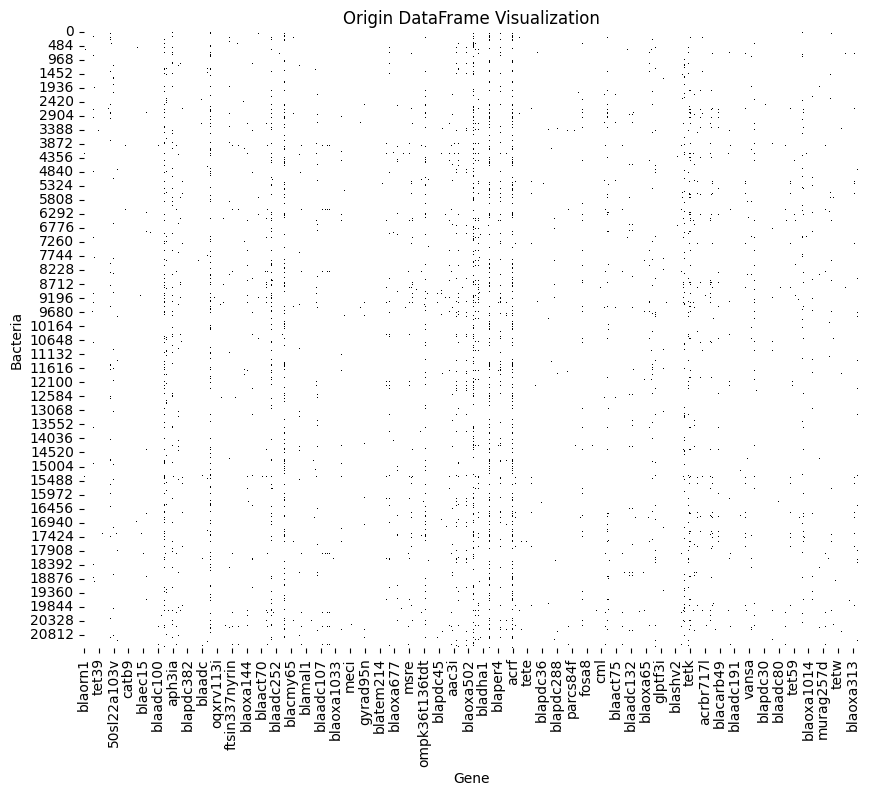

In [75]:
#plot origin data

plt.figure(figsize=(10, 8))
sns.heatmap(drug_df_for_clustering, cmap='binary', cbar=False)
plt.title('Origin DataFrame Visualization')
plt.xlabel('Gene')
plt.ylabel('Bacteria')
plt.show()

## on the train data

In [239]:
drug_train_for_model_ciprofloxacin = pd.read_csv(r'drug_train_for_model_ciprofloxacin.csv')
# drug_train_for_model_ciprofloxacin = drug_train_for_model_ciprofloxacin.drop('label', axis=1)
drug_train_for_model_ciprofloxacin = drug_train_for_model_ciprofloxacin.drop('Unnamed: 0', axis=1)
drug_train_for_model_ciprofloxacin

,qnrb6,qnrb4,qnrb19,qnrs2,qnrb1,qnrs1,qnrb35,qnrd1,qnre1,qnra6,qnrb2,qnrvc1,qnrb7,qnrb9,qnrb10,qnrb38,qnra1,label
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17013,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
17014,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
17015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
17016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


In [246]:
drug_df.isna().sum().sum()

drug_train_for_model_ciprofloxacin.isna().sum().sum()

0

In [241]:
cluster_df_2_ciprofloxacin_train_data = Bicluster_model_viz(drug_train_for_model_ciprofloxacin, 2, 'Bicluster_model 2 cluster train data')
cluster_df_2_ciprofloxacin_train_data.to_csv('cluster_df_2_ciprofloxacin_train data.csv')

C:\Users\PC\PycharmProjects\Ex3_machineLearning\venv\lib\site-packages\sklearn\cluster\_bicluster.py:35: RuntimeWarning: divide by zero encountered in divide
  row_diag = np.asarray(1.0 / np.sqrt(X.sum(axis=1))).squeeze()
C:\Users\PC\PycharmProjects\Ex3_machineLearning\venv\lib\site-packages\sklearn\cluster\_bicluster.py:45: RuntimeWarning: invalid value encountered in multiply
  an = row_diag[:, np.newaxis] * X * col_diag


ValueError: array must not contain infs or NaNs

In [136]:
# Assuming your array is named data_array
has_inf = np.isinf(data_matrix).any()
has_nan = np.isnan(data_matrix).any()

print("Contains Infinite Values:", has_inf)
print("Contains NaN Values:", has_nan)

Contains Infinite Values: False
Contains NaN Values: False


In [113]:
data_matrix = df.to_numpy()
# Perform biclustering
bicluster = SpectralBiclustering(n_clusters=3, random_state=42)
bicluster.fit(data_matrix)
row_labels = bicluster.row_labels_
# Create a DataFrame with the cluster labels
cluster_df = pd.DataFrame(data_matrix, index=row_labels, columns=df.columns)
cluster_df['Cluster'] = row_labels  # Add a column for the cluster labels

# Sort the DataFrame based on the cluster labels
cluster_df.sort_values('Cluster', inplace=True)

# Drop the 'Cluster' column for visualization
cluster_df.drop('Cluster', axis=1, inplace=True)

In [128]:
drug_train_for_model_ciprofloxacin

,qnrb6,qnrb4,qnrb19,qnrs2,qnrb1,qnrs1,qnrb35,qnrd1,qnre1,qnra6,qnrb2,qnrvc1,qnrb7,qnrb9,qnrb10,qnrb38,qnra1
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17013,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17014,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [137]:
data_matrix = drug_train_for_model_ciprofloxacin.to_numpy()
bicluster = SpectralBiclustering(n_clusters=3, random_state=42)
bicluster.fit(data_matrix)

C:\Users\PC\PycharmProjects\Ex3_machineLearning\venv\lib\site-packages\sklearn\cluster\_bicluster.py:35: RuntimeWarning: divide by zero encountered in divide
  row_diag = np.asarray(1.0 / np.sqrt(X.sum(axis=1))).squeeze()
C:\Users\PC\PycharmProjects\Ex3_machineLearning\venv\lib\site-packages\sklearn\cluster\_bicluster.py:45: RuntimeWarning: invalid value encountered in multiply
  an = row_diag[:, np.newaxis] * X * col_diag


ValueError: array must not contain infs or NaNs

In [117]:
row_labels = bicluster.row_labels_


In [ ]:
cluster_df = pd.DataFrame(data_matrix, index=row_labels, columns=df.columns)
cluster_df['Cluster'] = row_labels  # Add a column for the cluster labels

In [111]:
drug_df_for_clustering

,blaorn1,catb,oqxb25,qnrb10,mgrbq30stop,blacmy83,nfsar203c,qnrvc,blartg,parcs87i,...,blaadc33,blaoxa313,blavim4,blaadc5,gyrat83i,blashv205,tet41,blaoxa193,blaadc79,blaadc219
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
21279,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21280,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21281,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
drug_train_for_model_ciprofloxacin

,qnrb6,qnrb4,qnrb19,qnrs2,qnrb1,qnrs1,qnrb35,qnrd1,qnre1,qnra6,qnrb2,qnrvc1,qnrb7,qnrb9,qnrb10,qnrb38,qnra1
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17013,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17014,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## drug

In [247]:
drug = 'clindamycin'
drug_df,drug_genes = gene_per_drug_all(drug)
drug_df = create_gene_df(drug_df, drug_genes)
drug_df

,arr2,catb3,teto,fusal461k,oqxb25,gyrad87n,tetk,blacmy65,parcs80i,blaoxa493,...,pbp4r200l,lsae,emrc,gyrat86v,gyrat83i,mprfl826f,vang,mdtm,blaoxa193,label
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3650,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
3651,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3652,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


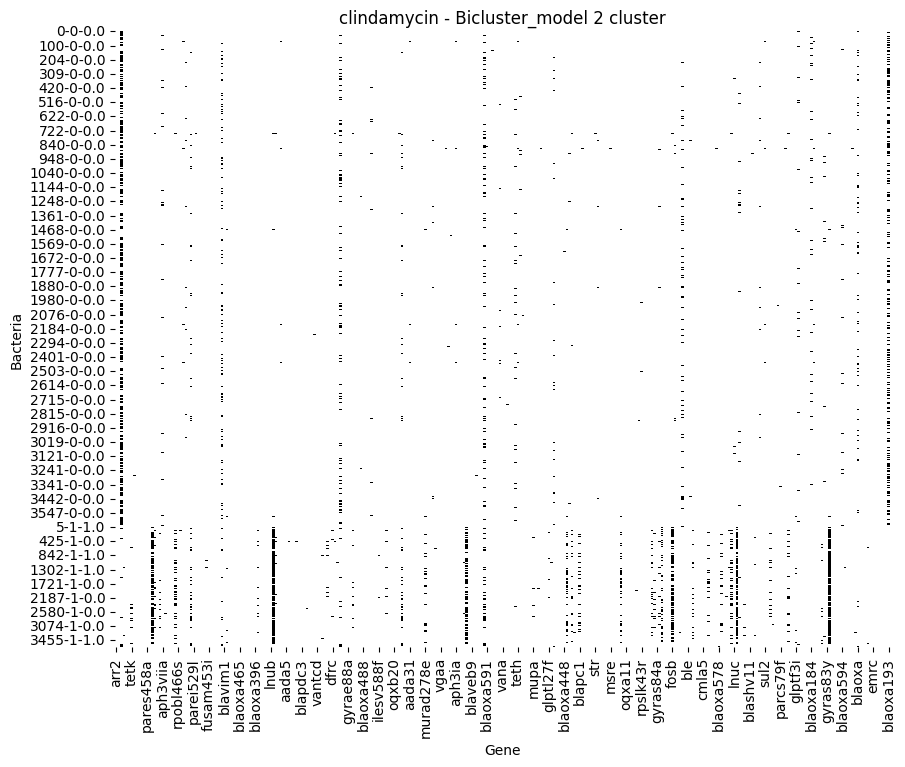

In [248]:
cluster_df_2_clindamycin = Bicluster_model_viz(drug_df, 2, 'clindamycin - Bicluster_model 2 cluster')
cluster_df_2_clindamycin.to_csv('cluster_df_2_clindamycin.csv')